# COGS 108 - EDA Checkpoint

# Names

- Sebastian Algharaballi (A16314698)
- Kenneth Hogan (A16404864)
- Evan Liu (A16675674)
- Lauren Lui (A16657998)
- Aarohi Zade (A16222196)

<a id='research_question'></a>
# Research Question

“Is there a correlation between the liveliness (as measured by BPM, valence, and energy) of the top 50 Spotify songs in the United States per month from 2012-2022 and economic prosperity of the US population (as measured by country-wide consumer confidence)?”

# Setup

In [1]:
# import pandas library
import pandas as pd

!pip install openpyxl
import openpyxl

import numpy as np

# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

Defaulting to user installation because normal site-packages is not writeable


# Data Cleaning

__Steps Implemented Below:__

- Load a CSV file of data pertaining to the top songs from 2010-2018
- Drop 2012 and 2019 data with insufficient number of songs
- Filter the data to contain needed columns (Artist/Track Name, Year, BPM, Valence, and Energy)
- Rename columns


In [2]:
#Load a csv file of data
temp = pd.read_csv('top10s.csv', encoding='latin-1')

#Drop 2012 and 2019 data with insufficient number of songs
temp = temp[temp.year != 2012]
temp = temp[temp.year != 2019]

top_50_by_year = None

initiated = False

for i in range(6):
    current_year = temp[temp.year == (2013 + i)]
    current_year = current_year.iloc[:-(current_year.shape[0] - 50)]
    
    if(not initiated):
        top_50_by_year = current_year
        initiated = True
    else:
        top_50_by_year = pd.concat([top_50_by_year, current_year])
        
top_50_by_year = top_50_by_year.reset_index()

del top_50_by_year['index']
del top_50_by_year['Unnamed: 0']

__Steps Implemented Below:__

> - Load CSV files of data pertaining to top songs in 2012, 2019, and 2020-2022
> - Filter our data files to include needed columns (Artist/Track Name, Year, BPM, Valence, and Energy)
> - Rename the titles of these respective columns in order to keep our data tidy

In [3]:
# filtering the data to only include certain columns (title, artist, bpm, valence, energy)
top_50_by_year = top_50_by_year[['title', 'artist', 'year', 'bpm', 'val', 'nrgy']]
top_50_by_year

# renaming the title of each column to keep data consistent and tidy
top_50_by_year = top_50_by_year.rename({'title' : 'Track Name', 'artist' : 'Artist', 'year': 'Year', 'bpm': 'BPM' , 'val': 'Valence' , 'nrgy': 'Energy'}, axis = 'columns')
top_50_by_year

top_50_by_year['Valence'] = top_50_by_year['Valence'].div(100)
top_50_by_year['Energy'] = top_50_by_year['Energy'].div(100)

top_50_by_year

,Track Name,Artist,Year,BPM,Valence,Energy
0,Underneath the Tree,Kelly Clarkson,2013,160,0.69,0.81
1,Wake Me Up,Avicii,2013,124,0.64,0.78
2,Story of My Life,One Direction,2013,121,0.29,0.66
3,Just Give Me a Reason (feat. Nate Ruess),P!nk,2013,95,0.44,0.55
4,Hall of Fame,The Script,2013,85,0.63,0.87
...,...,...,...,...,...,...
295,Want To,Dua Lipa,2018,92,0.32,0.69
296,What I Need (feat. Kehlani),Hayley Kiyoko,2018,104,0.41,0.79
297,Wait,Maroon 5,2018,126,0.45,0.60
298,What About Us,P!nk,2018,114,0.19,0.59


In [4]:
# Load a csv file of data
top_50_2012 = pd.read_csv('spotifytoptracks2012.csv', encoding = "ISO-8859-1")
top_50_2012 = top_50_2012[top_50_2012.year == 2012]
top_50_2012 = top_50_2012.iloc[:-(top_50_2012.shape[0] - 50)]
top_50_2012 = top_50_2012[['artist', 'song', 'year', 'energy', 'tempo', 'valence']]
top_50_2012 = top_50_2012.rename({'artist': 'Artist', 'song': 'Track Name', 'year': 'Year', 'energy': 'Energy', 'tempo': 'BPM', 'valence': 'Valence'}, axis = 'columns')
top_50_2012 = top_50_2012[['Track Name', 'Artist', 'Year', 'BPM', 'Valence', 'Energy']]

# Load a csv file of data
top_50_2019 = pd.read_csv('spotifytoptracks2019.csv', encoding = "ISO-8859-1")
top_50_2019 = top_50_2019[['Artist.Name', 'Track.Name', 'Energy', 'Beats.Per.Minute', 'Valence.']]
top_50_2019 = top_50_2019.rename({'Artist.Name': 'Artist', 'Track.Name': 'Track Name', 'Beats.Per.Minute': 'BPM', 'Valence.': 'Valence'}, axis = 'columns')
top_50_2019 = top_50_2019[['Track Name', 'Artist', 'BPM', 'Valence', 'Energy']]
top_50_2019['Valence'] = top_50_2019['Valence'].div(100)
top_50_2019['Energy'] = top_50_2019['Energy'].div(100)
top_50_2019.insert(2, 'Year', 2019)

# Load a csv file of data
top_50_2020 = pd.read_csv('spotifytoptracks2020.csv')

# filtering the data to only include certain columns (artist, track_name, energy, tempo, valence)
top_50_2020 = top_50_2020[['artist', 'track_name', 'energy', 'tempo', 'valence']]

# renaming the title of each column to keep data consistent and tidy
top_50_2020 = top_50_2020.rename({'artist': 'Artist', 'track_name': 'Track Name', 'energy': 'Energy', 'tempo': 'BPM', 'valence': 'Valence'}, axis = 'columns')

# reordering the columns to match column order of other datasets - maintain consistency
top_50_2020 = top_50_2020[['Track Name', 'Artist', 'BPM', 'Valence', 'Energy']]

top_50_2020.insert(2, 'Year', 2020)

# Load a csv file of data
top_50_2021 = pd.read_csv('spotifytoptracks2021.csv')

# renaming the title of each column to keep data consistent and tidy
top_50_2021 = top_50_2021.rename({'artist_name': 'Artist', 'track_name': 'Track Name', 'energy': 'Energy', 'tempo': 'BPM', 'valence': 'Valence'}, axis = 'columns')

# filtering the data to only include certain columns (artist, track name, energy, valence, BPM)
top_50_2021 = top_50_2021[['Artist', 'Track Name', 'Energy', 'Valence', 'BPM']]

# reordering the columns to match column order of other datasets - maintain consistency
top_50_2021 = top_50_2021[['Track Name', 'Artist', 'BPM', 'Valence', 'Energy']]

top_50_2021.insert(2, 'Year', 2021)

# Load a csv file of data
top_50_2022 = pd.read_excel('Spotify.xlsx', sheet_name = 'Top50USA')

# renaming the title of each column to keep data consistent and tidy
top_50_2022 = top_50_2022.rename({'artist': 'Artist', 'name': 'Track Name', 'energy': 'Energy', 'tempo': 'BPM', 'valence': 'Valence'}, axis = 'columns')

# reordering the columns to match column order of other datasets - maintain consistency
top_50_2022 = top_50_2022[['Track Name', 'Artist', 'BPM', 'Valence', 'Energy']]

top_50_2022.insert(2, 'Year', 2022)

In [5]:
top_50_by_year = pd.concat([top_50_2012, top_50_by_year, top_50_2019, top_50_2020, top_50_2021, top_50_2022])
top_50_by_year = top_50_by_year.reset_index(drop=True)

top_50_by_year

,Track Name,Artist,Year,BPM,Valence,Energy
0,Crossroads - Radio Edit,Blazin' Squad,2012,144.188,0.502,0.746
1,Let Me Go,3 Doors Down,2012,92.004,0.491,0.863
2,Something Kinda Ooooh,Girls Aloud,2012,131.925,0.879,0.908
3,Let Me Think About It,Ida Corr,2012,129.026,0.715,0.754
4,California Gurls,Katy Perry,2012,125.014,0.425,0.754
...,...,...,...,...,...,...
545,BREAK MY SOUL,BeyoncÃ©,2022,114.942,0.864,0.887
546,DespuÃ©s de la Playa,Bad Bunny,2022,78.293,0.607,0.903
547,She Had Me At Heads Carolina,Cole Swindell,2022,134.944,0.722,0.912
548,Static,Steve Lacy,2022,79.001,0.215,0.305


__Steps Implemented Below:__

> - Load CSV file of data containing consumer confidence reports from 2018-2022
> - Filter this data to only include rows pertaining to the United States
> - Further filter rows to only contain columns with info about location, time, and value
> - Rename column titles to keep data tidy

In [6]:
# Load a csv file of data
consumer_report = pd.read_csv('cc_usa.csv')
consumer_report

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,CCI,AMPLITUD,LTRENDIDX,M,2011-11,98.19862,NaN
1,OECD,CCI,AMPLITUD,LTRENDIDX,M,2011-12,98.39256,NaN
2,OECD,CCI,AMPLITUD,LTRENDIDX,M,2012-01,98.60789,NaN
3,OECD,CCI,AMPLITUD,LTRENDIDX,M,2012-02,98.76552,NaN
4,OECD,CCI,AMPLITUD,LTRENDIDX,M,2012-03,98.84362,NaN
...,...,...,...,...,...,...,...,...
259,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-06,96.02940,NaN
260,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-07,95.99727,NaN
261,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-08,96.27924,NaN
262,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-09,96.55611,NaN


In [7]:
# filter data to only include rows where the LOCATION is the 'USA'
consumer_report = consumer_report[consumer_report.LOCATION == 'USA']
consumer_report

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
132,USA,CCI,AMPLITUD,LTRENDIDX,M,2011-11,97.37355,NaN
133,USA,CCI,AMPLITUD,LTRENDIDX,M,2011-12,97.93830,NaN
134,USA,CCI,AMPLITUD,LTRENDIDX,M,2012-01,98.41976,NaN
135,USA,CCI,AMPLITUD,LTRENDIDX,M,2012-02,98.68818,NaN
136,USA,CCI,AMPLITUD,LTRENDIDX,M,2012-03,98.81753,NaN
...,...,...,...,...,...,...,...,...
259,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-06,96.02940,NaN
260,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-07,95.99727,NaN
261,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-08,96.27924,NaN
262,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-09,96.55611,NaN


In [8]:
# filtering the data to only include certain columns (location, time, value)
consumer_report = consumer_report[['LOCATION', 'TIME', 'Value']]

In [9]:
# renaming the title of each column to keep data consistent and tidy
consumer_report = consumer_report.rename({'LOCATION': 'Location', 'TIME': 'Time'}, axis = 'columns')
consumer_report = consumer_report.reset_index(drop = True)

In [10]:
# convert time values to datetime objects
consumer_report['Time'] =  pd.to_datetime(consumer_report['Time'])
consumer_report['Time']

0     2011-11-01
1     2011-12-01
2     2012-01-01
3     2012-02-01
4     2012-03-01
         ...    
127   2022-06-01
128   2022-07-01
129   2022-08-01
130   2022-09-01
131   2022-10-01
Name: Time, Length: 132, dtype: datetime64[ns]

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [11]:
top_50_avgs = pd.DataFrame()

for i in range(11):
    temp = top_50_by_year[top_50_by_year['Year'] == (2012 + i)]
    avg_bpm = temp['BPM'].mean()
    avg_val = temp['Valence'].mean()
    avg_energy = temp['Energy'].mean()
    
    data = [[avg_bpm, avg_val, avg_energy]]
  
    df = pd.DataFrame(data, columns=['Avg_BPM', 'Avg_Val', 'Avg_Energy'])
    top_50_avgs = pd.concat([top_50_avgs, df])
    
top_50_avgs.index = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
top_50_avgs

,Avg_BPM,Avg_Val,Avg_Energy
2012,124.47260,0.576286,0.77752
2013,121.56000,0.535600,0.73260
2014,125.50000,0.527200,0.69440
2015,121.86000,0.522400,0.68840
2016,115.94000,0.451600,0.67880
2017,116.96000,0.532200,0.68640
2018,115.50000,0.488600,0.65960
2019,120.06000,0.546000,0.64060
2020,119.69046,0.555710,0.60930
2021,121.08386,0.528884,0.64636


<AxesSubplot:xlabel='Year', ylabel='Avg_Energy'>

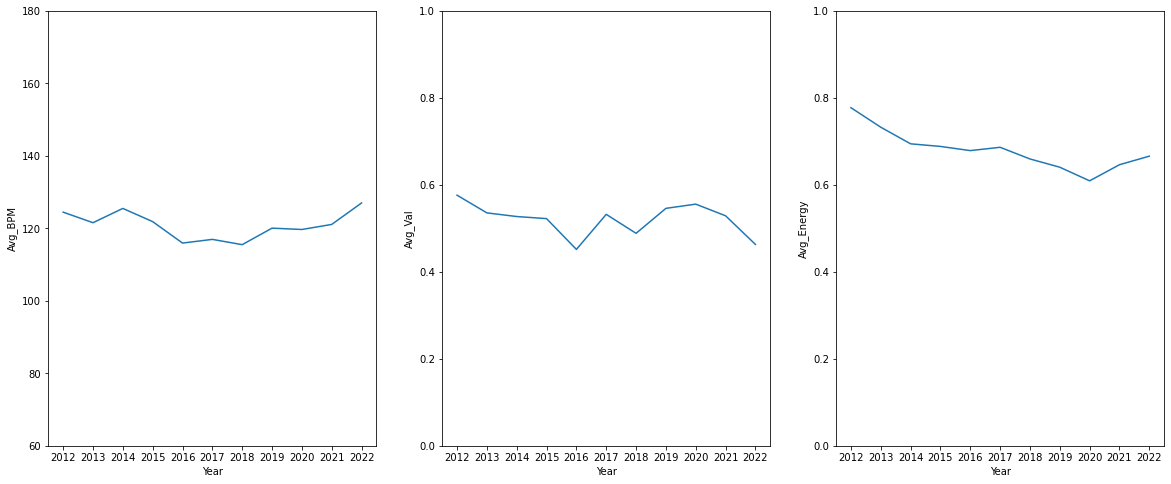

In [25]:
#Mention 2016 and 2022 Drops in Valence
#Valence describes the musical positiveness conveyed by a track

top_50_avgs['Avg_BPM_L10'] = np.log10(top_50_avgs.Avg_BPM + 0.1)
top_50_avgs['Avg_Val_L10'] = np.log10(top_50_avgs.Avg_Val + 0.1)
top_50_avgs['Avg_Energy_L10'] = np.log10(top_50_avgs.Avg_Energy + 0.1)

f1, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (20, 8))

ax1.set_ylim(60, 180)

#Restrict bounds of Valence and Energy to [0, 1]
ax2.set_ylim(0, 1)
ax3.set_ylim(0, 1)

ax1.set_xlabel("Year")
ax2.set_xlabel("Year")
ax3.set_xlabel("Year")

sns.lineplot(data=top_50_avgs, x=top_50_avgs.index, y="Avg_BPM", ax=ax1)
sns.lineplot(data=top_50_avgs, x=top_50_avgs.index, y="Avg_Val", ax=ax2)
sns.lineplot(data=top_50_avgs, x=top_50_avgs.index, y="Avg_Energy", ax=ax3)

__Figure 1.__ The relative relationship between the average BPM, valence, and energy of the top 50 songs from the years 2012-2022 respectively. 


The image above visualizes each parameter we defined in our research question for liveliness which was BPM, valence, and energy, plotted against the years 2012-2022 in which we focus on in our research question. 

The graph on the left plots the average BPM of the top 50 songs against year from 2010-2022. The BPM is defined as the beats per minute of the song which provides valuable information on the relative liveliness. Based on the graph, there are trends in the data in the years 2016 and 2018 as the average BPM significantly dips in 2016 and then in 2018 and then proceeds to gradually trend upwards after 2018. 

The graph in the middle plots the average valence of the top 50 songs against year from 2010-2022. The valence is the musical positivity of a song which is another musical element in which we are measuring the relative liveliness of songs. Based on the graph, there is a noticeable downward trend in 2016, 2018, and then a gradual decline in 2020. 

The graph on the left plots the average energy of the top 50 songs against year from 2010-2022. The energy of a song measures the intensity and activity of a song which is valuable information when analyzing and assessing the liveliness of songs. Based on the graph, there are also changes in the average energy in the years 2016 and 2020 which correlate with the trends for the average valence as shown in Figure 1b.

The reasoning behind generating these three line plots is to analyze the trends in the average BPM, valence, and energy, which we define as our elements of study for liveliness, and how these trends correlate with the particular years from 2010-2022 which we are focusing on. By generating these plots, we are able to see in which years there are significant changes in the average liveliness of the top 50 songs. 

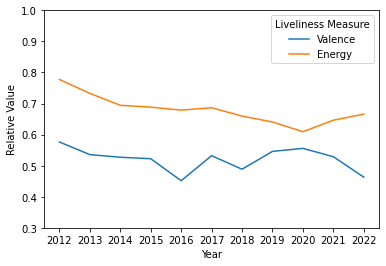

In [13]:
fig, ax = plt.subplots()
ax = sns.lineplot(x=top_50_avgs.index, y='Avg_Val', data=top_50_avgs)
ax1 = sns.lineplot(x=top_50_avgs.index, y='Avg_Energy', data=top_50_avgs)

ax.set_ylim(0.3, 1)
ax.set_ylabel("Relative Value")
ax.set_xlabel("Year")

plt.legend(title='Liveliness Measure', loc='upper right', labels=['Valence', 'Energy'])

__Figure 1b.__ The relative relationship between average valence and energy of the top 50 songs from 2012-2022.

The reasoning behind generating Figure 1b is to compare the average valence and energy with respect to our specified years of focus from 2010-2022. This comparison was deemed a necessary one to include because of the fact that the present analysis measures the liveliness of a song as a function of both valence and energy, and a comparison between the trends of both categories would demonstrate whether or not the consideration of both valence and energy could be accurately used to determine a uniform measure of liveliness or whether the measures were too different to be paralleled. 

As the average valence and energy are both scaled between 0 and 1, we compared the trends in these averages. Based on the graph, we see that initially, the valence and energy follow the same downward trend from 2012- 2015 until the valence significantly dips in 2016. Similarly, in 2020, the valence and energy trends mirror one another until 2022. The reason we see these trends is because in the years 2016 and 2020, the economy experienced shifts from the election and COVID-19. These periods in which the economy experiences shifts could be considered for why the valence and the energy also reflected these changes, and therefore the liveliness of the top 50 songs. Focusing on the years 2020-2022, a reason for the average valence and energy to trend in opposite directions is that during this time, there could have been more releases of high energy songs while still maintaining a more negatively low valence sound reflecting the economic downtrends of the time.

However, it is also important to consider external variables which could also affect the average BPM, valence, and energy and not just the shifts in the economy, but also the rise of social and political events. The rise of social media platforms like TikTok could also contribute to the rise and popularity of certain songs which are trending based on the overall well being of the country. 


In [14]:
avg_ccs = pd.DataFrame()

#.dt.year
for i in range(11):
    temp = consumer_report[consumer_report['Time'].dt.year == (2012 + i)]
    
    avg_cc = temp['Value'].mean()
    data = [[avg_cc]]
    
    df = pd.DataFrame(data, columns=['Avg_CC'])
    avg_ccs = pd.concat([avg_ccs, df])
    
avg_ccs.index = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
avg_ccs['Avg_CC_Trans'] = np.log10((avg_ccs.Avg_CC - 96) + 0.1) - 0.5
avg_ccs

,Avg_CC,Avg_CC_Trans
2012,98.798898,-0.037767
2013,99.137754,0.010244
2014,99.747946,0.085229
2015,100.802283,0.190398
2016,100.682750,0.179678
2017,101.286333,0.231293
2018,101.456867,0.244830
2019,101.229983,0.226726
2020,99.395496,0.043509
2021,98.949236,-0.015809


Text(0.5, 0, 'Year')

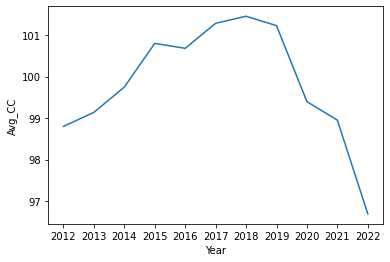

In [15]:
ax = sns.lineplot(x=avg_ccs.index, y='Avg_CC', data=avg_ccs)
ax.set_xlabel("Year")

__Figure 1c.__ The average US consumer confidence from 2012-2022.

The visualization in Figure 1c plots the average consumer confidence from the years 2012-2022. As seen in the graph,  there is a gradual increase in the average consumer confidence until the year 2016 where it slightly decreases and then again in 2019-2020 where the overall consumer confidence significantly declines. These years in which the consumer confidence significantly declines, 2016 and 2020, reflect the economic shifts during the election of 2016 and the start of COVID-19 in 2019-2020.

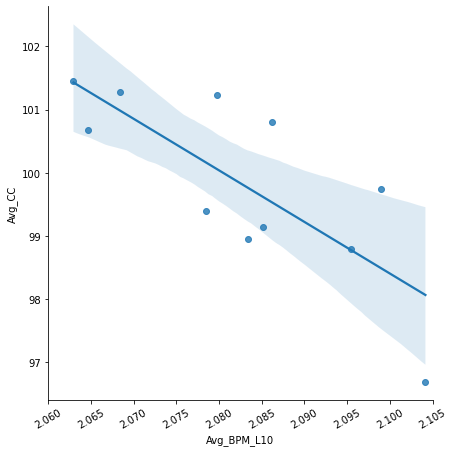

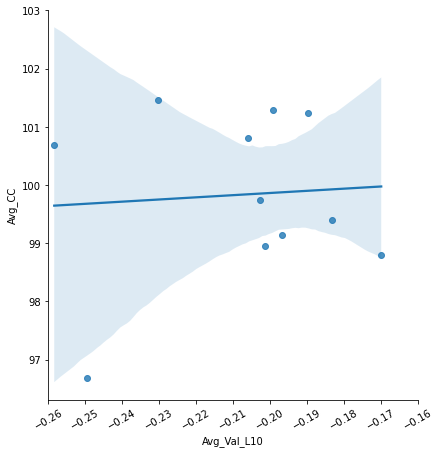

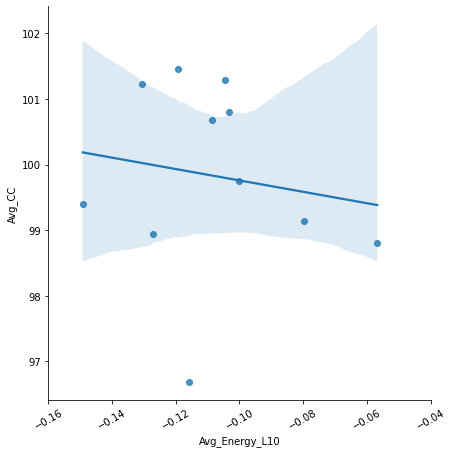

In [23]:
#Scatter (for determining relationships between 1 or more liveliness values and cc)

avg_stats = pd.concat([top_50_avgs, avg_ccs]);
avg_stats = top_50_avgs;
avg_stats["Avg_CC"] = avg_ccs['Avg_CC'];
#avg_stats["Avg_CC_Trans"] = avg_ccs['Avg_CC_Trans']

ax1 = sns.lmplot(x='Avg_BPM_L10', y='Avg_CC', data=avg_stats, height=6);
ax1.set_xticklabels(rotation=30);

ax2 = sns.lmplot(x='Avg_Val_L10', y='Avg_CC', data=avg_stats, height=6);
ax2.set_xticklabels(rotation=30);

ax3 = sns.lmplot(x='Avg_Energy_L10', y='Avg_CC', data=avg_stats, height=6);
ax3.set_xticklabels(rotation=30);

__Figure 2.__ Subvariable Regression Models

The collection of subplots displayed above demonstrate the apparent correlations between consumer confidence ratings in the United States from 2012 to 2022 and each measure of liveliness outlined in the present research question. The motivation behind the inclusion of these plots was to highlight any relationships that existed between the three perceived measures of musical liveliness and consumer confidence over the same time periods, results that could then be extended to draw conclusions about the positive or negative economic implications of fluctuating liveliness metrics. Inherently, it was anticipated that a scatter-based regression model would provide effective, meaningful results for the desired objective because of their visual representations of relevant analytical values such as variance and regression coefficients, making it a simple task to identify any existing relationships between the variables of interest. Linear regression was deemed a feasible mode of comparison due to the fact that the numerical data represented by each variable demonstrated relatively linear relationships when plotted separately (see fig. 1), lacked multicolinearity and autocorrelation by virtue of their apparent independence, and demonstrated homoscedasticity on account of the relatively miniscule variance between the discrete data points in their relative scales.

The results yielded by the regression model analyzing the temporal relationships between average consumer confidence and average BPM demonstrated the existence of a strong, negative correlation between the two metrics. In other words, it was determined that increases in the average tempo of the most popular Spotify songs over time appeared to be associated with relatively consistent and magnitudinous decreases in consumer confidence over the same time period. 

The results yielded by the regression model analyzing the temporal relationships between average consumer confidence and average valence demonstrated the existence of a very weak, positive correlation between the two metrics. In other words, it was determined that increases in the average valence of the most popular Spotify songs over time appeared to be associated with relatively consistent and extremely slight increases in consumer confidence over the same time period. This essentially means that we cannot conclude that changes in consumer confidence could be correlated with changes in valence, meaning that the aspect of valence in our definition of liveliness is not strong enough to make an overall connection to that of consumer confidence.

The results yielded by the regression model analyzing the temporal relationships between average consumer confidence and average BPM demonstrated the existence of a very weak, negative correlation between the two metrics. In other words, it was determined that increases in the average energy of the most popular Spotify songs over time appeared to be associated with relatively consistent and extremely slight decreases in consumer confidence over the same time period. Like stated above for valence, this all means that we cannot conclude that changes in consumer confidence could be correlated with changes in energy.

Due to the apparent results that we found in our data for valence and energy and our pre-defined components for liveliness, this set of regression models infers that the only aspect of liveliness that could have been affected by a change in consumer confidence was BPM. Since BPM is not the only quality of a song that determines liveliness, we simply cannot say that overall liveliness in trending music has anything to do with the consumer confidence of our given time period, at least going off of the results from these few graphs. We can potentially investigate the reasonings behind such a negative relationship between that of BPM and consumer confidence and come to a correlation between these two variables. However, this would be moving outside of the scope of this particular project since, once again, BPM is not the only aspect of a song that deems it lively or not.

/tmp/ipykernel_349/1749744877.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter[6,6].set_yticklabels(['90', '92', '94', '96', '98', '100', '102', '104'])


[Text(0, 0.0, '90'), Text(0, 2.0, '92'), Text(0, 4.0, '94')]

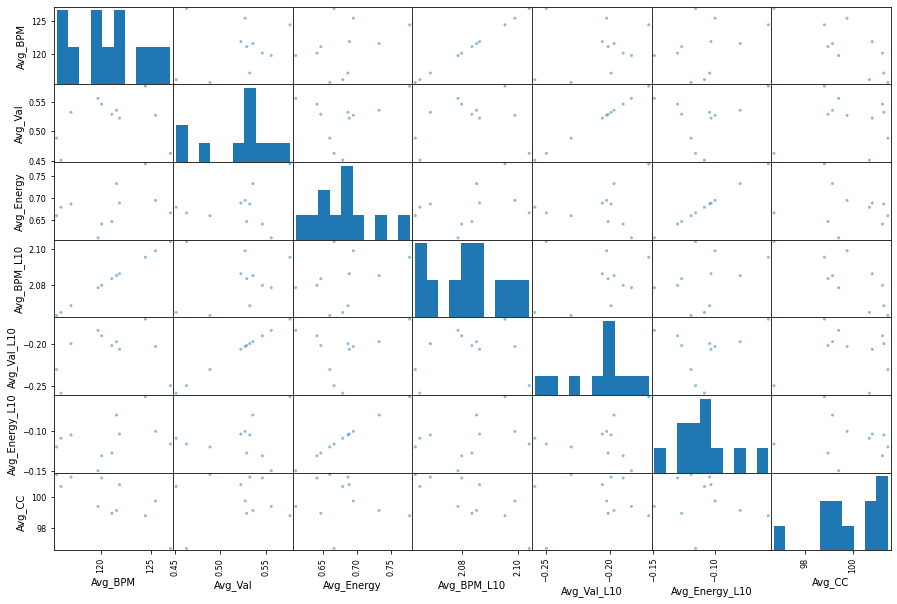

In [27]:
#Display Average Statistics Scatter Matrix

scatter = pd.plotting.scatter_matrix(avg_stats, figsize=(15, 10))

#Adjusting for small scale of consumer confidence visualization
scatter[6,6].set_yticklabels(['90', '92', '94', '96', '98', '100', '102', '104'])

__Figure 2a.__ Supplementary Subvariable Scatter Matrix

The scatter matrix displayed above contains scatter plots identical to the ones displayed in Figure 2, and also contains diagonal entries that reflect the relative distributions of each of the variables of interest and their logarithmically-transformed counterparts. The results of these latter plots serve to substantiate the decision to utilize linear regression visualizations as a form of analysis by demonstrating the relatively uniform variation of each variable and the differences between both these variances and distributions with respect to each other variable. These distribution qualities are made more evident in the depictions of the logarithmic distributions, which better highlight the pre-existing relatively-normal distributions within each of the original variable data.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


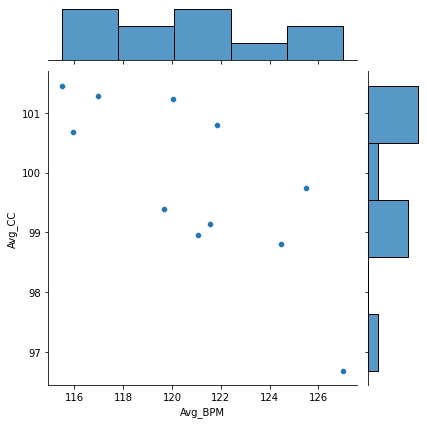

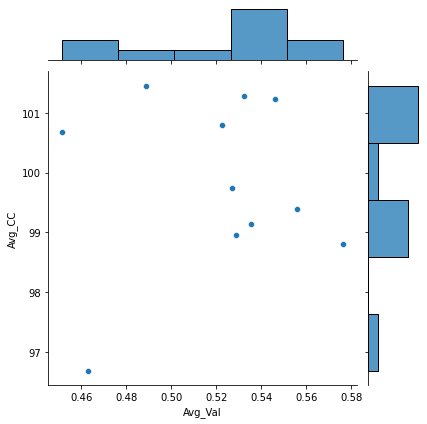

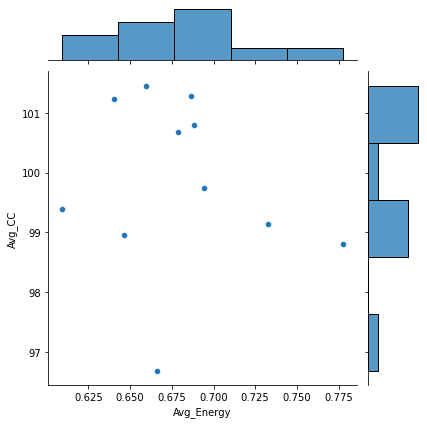

In [19]:
#Jointplots

sns.jointplot("Avg_BPM", "Avg_CC", data=avg_stats)
sns.jointplot("Avg_Val", "Avg_CC", data=avg_stats)
sns.jointplot("Avg_Energy", "Avg_CC", data=avg_stats)

__Figure 3.__ Joint plots to look further into the bivariate and univariate relationships within our data.

The purpose behind our creation of the joint plot was to gain an extra view into the relationships between our data and their own individual distributions. Even though Figure 2 showed that our variables of energy and valence had little to no visible relationship with consumer confidence, we wanted to take one more closer look at our data and try to find any additional patterns that could potentially be used to solve our research question, especially since we previously discovered that BPM had a severely negative relationship with CC. 

As seen in the top figure, we compared the average BPM of the songs in our dataset to the average consumer confidence our study is based off of. This method allowed us to see that there is a clear negative correlation between the two (which was further supported by our results from Figure 2). Because this is a joint plot and not a density plot as used before, we were able to look even further into this potential relationship and analyze the univariate distributions for each of the two variables. We noticed that the distribution for average BPM was much more spread out and even than that of average consumer confidence. We also saw that each bar in average BPM was greater than the opposing bar representing consumer confidence, essentially confirming that without considering unknown third variables, it seems as if these two categories are negatively correlated. Going back to the shape of the individual distributions, the univariate data showcases that average BPM does not have drastic and uneven changes like average consumer confidence does. While the BPM does increase and decrease in value as you move down the bar graph, average consumer confidence is super high in one bar, super low in another, moderate in another, and completely empty towards the tail end. This makes us wonder whether or not the decrease seen in BPM does have something to do with a decrease in consumer confidence, or if the slight changes in BPM are completely independent from the drastic changes in consumer confidence that is shown through its individual distribution.

We followed this same analyzation process for the remaining two joint plot graphs we had generated, but were simply unable to discover any additional patterns that could be connected to our definition of liveliness we created before seeing this data. The bivariate scatter plots between CC, valence, and energy essentially confirmed that there is little to no relationship to be found between these aspects of liveliness we defined previously. However, there were some noticeable discrepancies when looking at the univariate data for each of the variables in question. While BPM maintained a generally high value in each of the bars, average valence maintained a much lower value besides in the second to last bin, which can potentially be attached to the general public enjoying songs that maintain a high BPM and low valence. In addition, valence’s highest value came at the lowest point for average consumer confidence, which is a very interesting univariate relationship, but still not enough to definitely say that liveliness and consumer confidence have a correlational relationship. Looking at energy, we were able to see that the distribution generally increased until the midpoint where it took a deep dive, following the exact pattern that the individual CC data shows. While the bivariate graph shows no relationship between energy and CC, could this trend in the univariate data be saying something else? Once again, we can not definitively say that it does, but it was still interesting to see that even though our bivariate data showed a lack of relationship between CC and energy, some aspects of the univariate data line up with one another.